In [1]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import cmasher as cm
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as grid
from matplotlib.colors import LogNorm

In [2]:
# LOAD THE DATA
# path = '/Users/dhortadarrington/Documents/Master/data/allstar-dr17-StarHorse-Gaiadr3'
path = '/Users/dhortadarrington/Documents/Master/data/MWM-ipl3-gaiadr3-APW_orbits_BJdist.fits'
tb = fits.open(path)
data = tb[1].data 
print(len(data))

1059521


In [3]:
# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_catalogo_14_mayo.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb2 = fits.open(path+file)
data2 = tb2[1].data
gc_star_ids = data2.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids))+' GC stars')

# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'VAC_GC_DR17_synspec_rev1_beta.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb3 = fits.open(path+file)
data3 = tb3[1].data
gc_star_ids_RPS = data3.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids_RPS))+' GC stars')

There are 7562 GC stars
There are 7737 GC stars


In [8]:
apo_id = data['sdss4_apogee_id']
# Clean the initial data
mask_gcs = np.isin(list(apo_id),list(gc_star_ids))
mask_gcs2 = np.isin(list(apo_id),list(gc_star_ids_RPS))

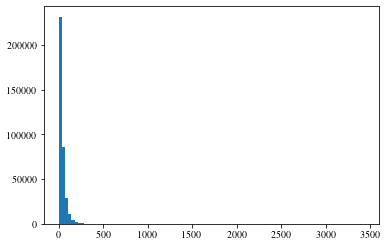

In [9]:
dist_err=(data['r_hi_photogeo']-data['r_lo_photogeo'])/2
dist = data['r_med_photogeo']

plt.hist(dist[mask]/dist_err[mask],100)
plt.show()

In [7]:
# create the parent mask
mask = (data['SNR']>70)&(data['LOGG']<3.5)&(data['LOGG']>0.)&(data['TEFF']>4000.)&(data['TEFF']<6000.)\
    &(mask_gcs==False)&(mask_gcs2==False)&(dist<20000)&(dist/dist_err>5)

print(len(data[mask]))

366749


In [23]:
print(np.shape(data['L']))

(1059521, 51)


In [10]:
mgmn =data['mg_h']-data['mn_h']
alfe = data['al_h']-data['fe_h']
feh = data['fe_h']
E = data['E'][:,0]
Lz = data['L'][:,2]
mnfe = data['mn_h']-data['fe_h']


(-1.0, 1.5)

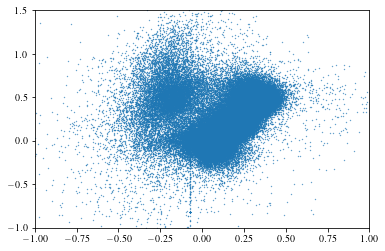

In [11]:
plt.scatter(alfe[mask],mgmn[mask],s=0.1)
plt.xlim(-1,1)
plt.ylim(-1,1.5)



In [12]:
rads = np.sqrt(data['xyz'][:,0,0]**2+data['xyz'][:,1,0]**2+data['xyz'][:,2,0]**2)
print(np.shape(data['xyz'][:,0,0]))

(1059521,)


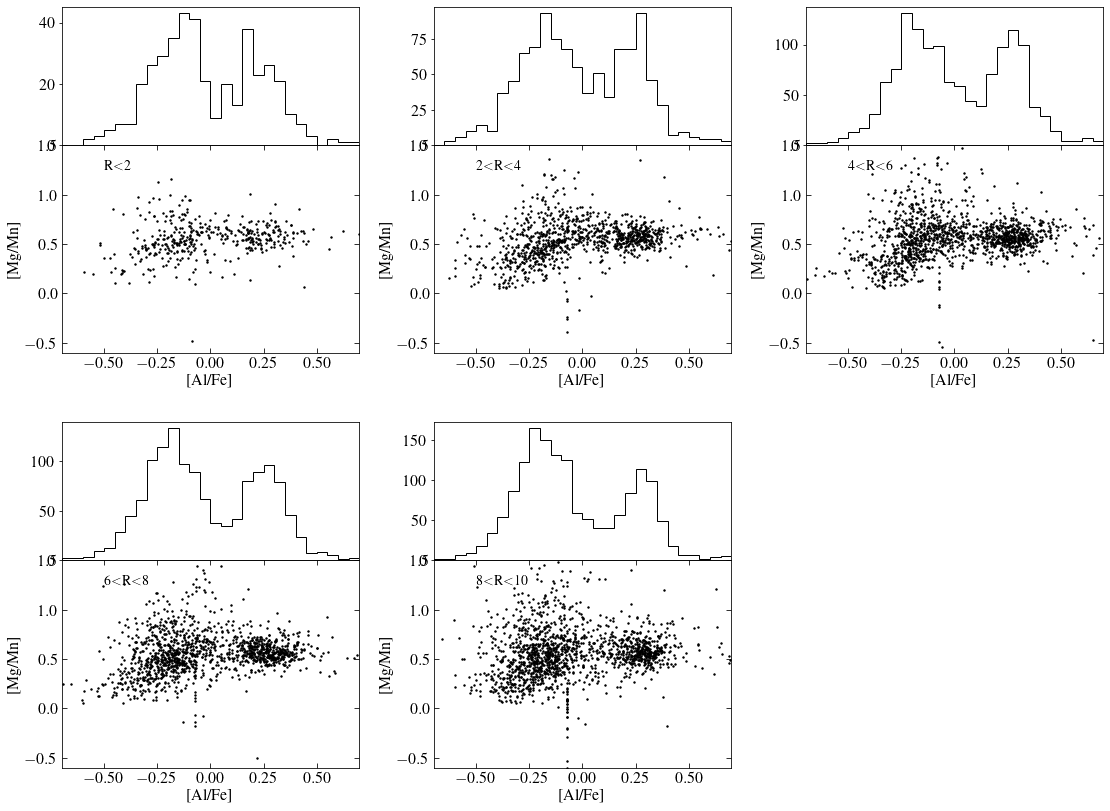

In [33]:
import matplotlib.gridspec as grid

fig = plt.figure(constrained_layout=True,figsize=(20,14),facecolor='white')
plt.rc('font',family='serif',size=14)
bins = np.linspace(-0.7,0.7,29)

rad_mask = rads<2
mask_bad = (alfe<-0.15)&(mgmn<0.05)
gs = grid.GridSpec(22,30)
ax_main = plt.subplot(gs[4:10,0:8])
ax_xDist = plt.subplot(gs[0:4, 0:8],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'R$<$2')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelbottom=False,bottom=False,labelsize=16)


rad_mask = (rads>2)&(rads<4)
ax_main = plt.subplot(gs[4:10,10:18])
ax_xDist = plt.subplot(gs[0:4,10:18],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'2$<$R$<$4')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)

rad_mask = (rads>4)&(rads<6)
ax_main = plt.subplot(gs[4:10,20:28])
ax_xDist = plt.subplot(gs[0:4,20:28],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'4$<$R$<$6')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)

rad_mask = (rads>6)&(rads<8)
ax_main = plt.subplot(gs[16:22,0:8])
ax_xDist = plt.subplot(gs[12:16,0:8],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'6$<$R$<$8')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)


rad_mask = (rads>8)&(rads<10)
ax_main = plt.subplot(gs[16:22,10:18])
ax_xDist = plt.subplot(gs[12:16,10:18],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'8$<$R$<$10')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)


gs.update(wspace=0.,hspace=0.)


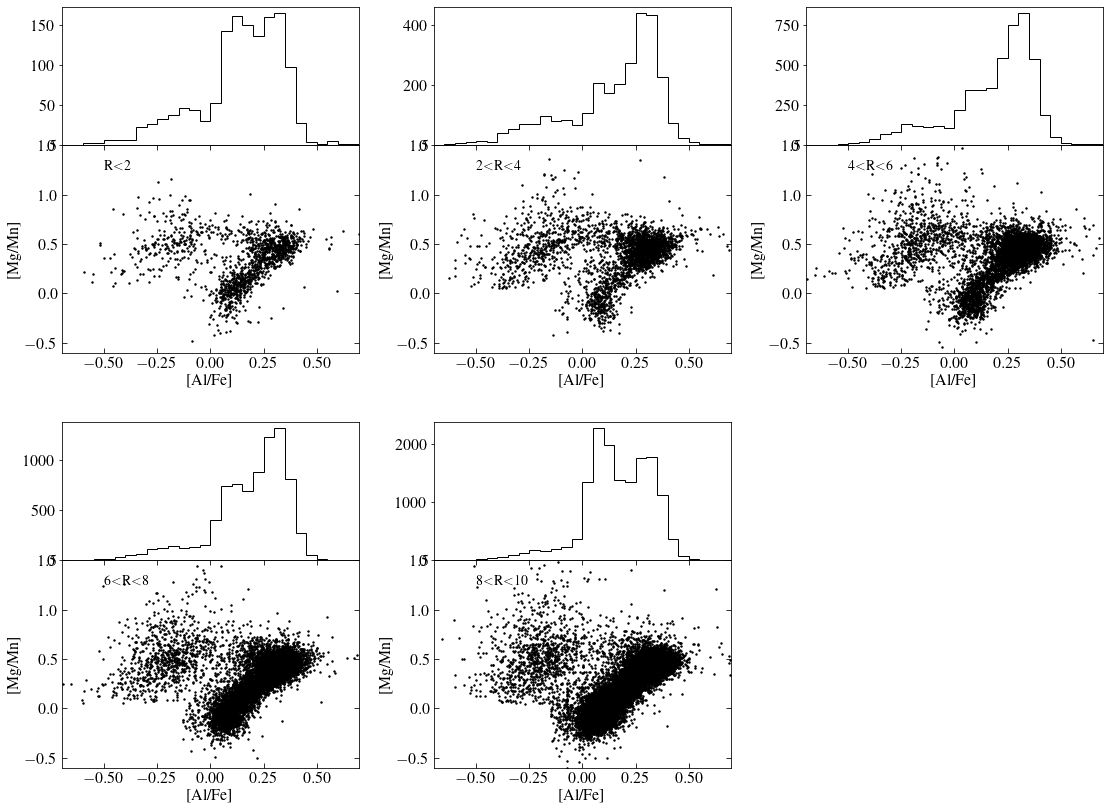

In [40]:
import matplotlib.gridspec as grid

fig = plt.figure(constrained_layout=True,figsize=(20,14),facecolor='white')
plt.rc('font',family='serif',size=14)
bins = np.linspace(-0.7,0.7,29)

rad_mask = rads<2
mask_bad = (alfe<-0.15)&(mgmn<0.05)
gs = grid.GridSpec(22,30)
ax_main = plt.subplot(gs[4:10,0:8])
ax_xDist = plt.subplot(gs[0:4, 0:8],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad],mgmn[mask&rad_mask&~mask_bad],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'R$<$2')

ax_xDist.hist(alfe[mask&rad_mask&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelbottom=False,bottom=False,labelsize=16)


rad_mask = (rads>2)&(rads<4)
ax_main = plt.subplot(gs[4:10,10:18])
ax_xDist = plt.subplot(gs[0:4,10:18],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad],mgmn[mask&rad_mask&~mask_bad],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'2$<$R$<$4')

ax_xDist.hist(alfe[mask&rad_mask&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)

rad_mask = (rads>4)&(rads<6)
ax_main = plt.subplot(gs[4:10,20:28])
ax_xDist = plt.subplot(gs[0:4,20:28],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad],mgmn[mask&rad_mask&~mask_bad],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'4$<$R$<$6')

ax_xDist.hist(alfe[mask&rad_mask&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)

rad_mask = (rads>6)&(rads<8)
ax_main = plt.subplot(gs[16:22,0:8])
ax_xDist = plt.subplot(gs[12:16,0:8],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad],mgmn[mask&rad_mask&~mask_bad],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'6$<$R$<$8')

ax_xDist.hist(alfe[mask&rad_mask&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)


rad_mask = (rads>8)&(rads<10)
ax_main = plt.subplot(gs[16:22,10:18])
ax_xDist = plt.subplot(gs[12:16,10:18],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad],mgmn[mask&rad_mask&~mask_bad],c='k',s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'8$<$R$<$10')

ax_xDist.hist(alfe[mask&rad_mask&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)


gs.update(wspace=0.,hspace=0.)


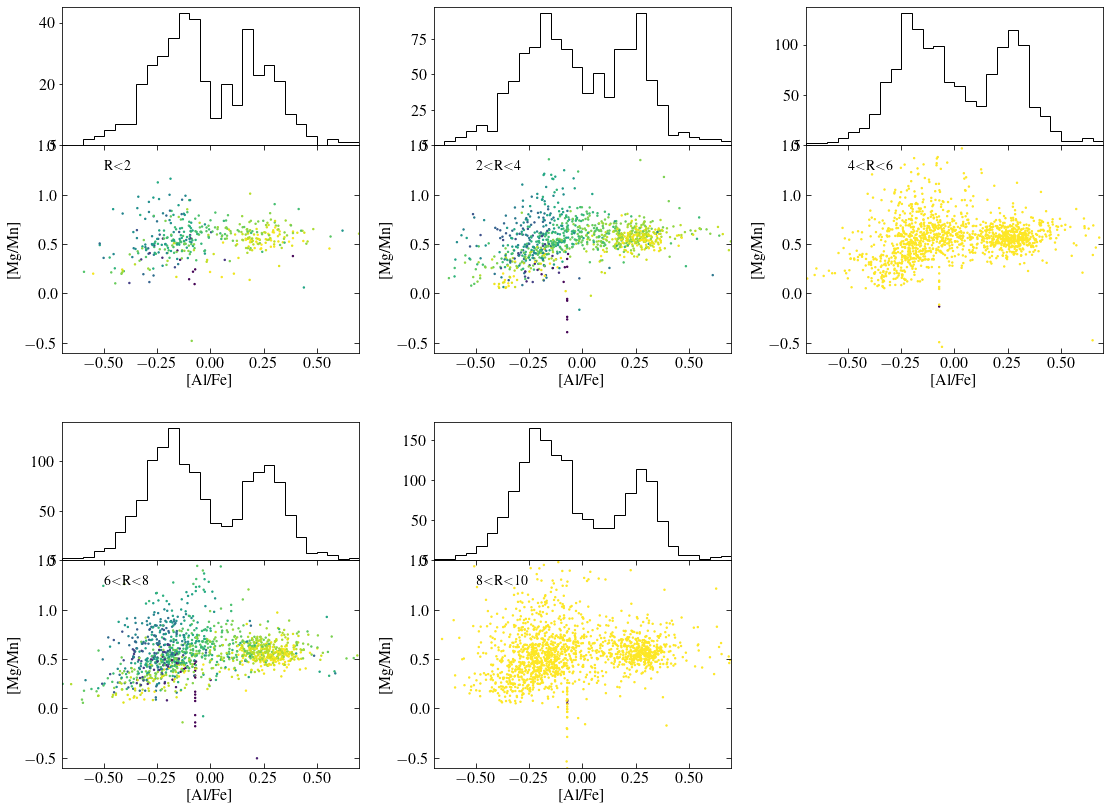

In [41]:
import matplotlib.gridspec as grid

fig = plt.figure(constrained_layout=True,figsize=(20,14),facecolor='white')
plt.rc('font',family='serif',size=14)
bins = np.linspace(-0.7,0.7,29)

rad_mask = rads<2
mask_bad = (alfe<-0.15)&(mgmn<0.05)
gs = grid.GridSpec(22,30)
ax_main = plt.subplot(gs[4:10,0:8])
ax_xDist = plt.subplot(gs[0:4, 0:8],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c=feh[mask&rad_mask&~mask_bad&(feh<-0.8)],s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'R$<$2')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelbottom=False,bottom=False,labelsize=16)


rad_mask = (rads>2)&(rads<4)
ax_main = plt.subplot(gs[4:10,10:18])
ax_xDist = plt.subplot(gs[0:4,10:18],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c=feh[mask&rad_mask&~mask_bad&(feh<-0.8)],s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'2$<$R$<$4')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)

rad_mask = (rads>4)&(rads<6)
ax_main = plt.subplot(gs[4:10,20:28])
ax_xDist = plt.subplot(gs[0:4,20:28],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c=feh[mask&rad_mask&~mask_bad&(feh<-0.8)],s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'4$<$R$<$6')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)

rad_mask = (rads>6)&(rads<8)
ax_main = plt.subplot(gs[16:22,0:8])
ax_xDist = plt.subplot(gs[12:16,0:8],sharex=ax_main)

ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c=feh[mask&rad_mask&~mask_bad&(feh<-0.8)],s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'6$<$R$<$8')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)


rad_mask = (rads>8)&(rads<10)
ax_main = plt.subplot(gs[16:22,10:18])
ax_xDist = plt.subplot(gs[12:16,10:18],sharex=ax_main)

color = ax_main.scatter(alfe[mask&rad_mask&~mask_bad&(feh<-0.8)],mgmn[mask&rad_mask&~mask_bad&(feh<-0.8)],c=feh[mask&rad_mask&~mask_bad&(feh<-0.8)],s=2,rasterized=True)
ax_main.set_xlim(-0.7,0.7)
ax_main.set_ylim(-0.6,1.5)
ax_main.set_xlabel('[Al/Fe]',fontsize=16)
ax_main.set_ylabel('[Mg/Mn]',fontsize=16)
ax_main.tick_params(labelsize=16,direction='in', right=True,top=True,length=5)
ax_main.text(-0.5,1.25,r'8$<$R$<$10')

ax_xDist.hist(alfe[mask&rad_mask&(feh<-0.8)&~mask_bad],bins=bins,color='k',histtype='step')
ax_xDist.tick_params(labelsize=16,labelbottom=False,bottom=False)


gs.update(wspace=0.,hspace=0.)


In [9]:
rad = np.sqrt(data['xyz'][:,0,0]**2+data['xyz'][:,1,0]**2+data['xyz'][:,2,0]**2)
print(np.shape(data['xyz'][:,0,0]))

(1059521,)


In [15]:
print(len(data[mask&(rad<3)&(feh<-1)]))

701


(-0.8, 1.2)

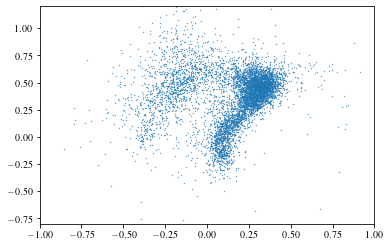

In [135]:
plt.scatter(alfe[mask&(rad<5)],mgmn[mask&(rad<5)],s=0.1)
plt.xlim(-1,1)
plt.ylim(-0.8,1.2)

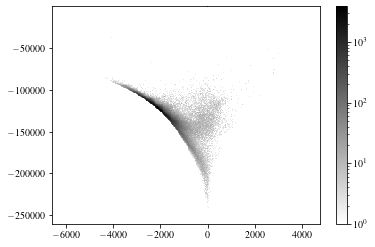

In [22]:
from matplotlib.colors import LogNorm

mask_plot = (np.abs(Lz)<7000) & (E>-5e5) & (E<0)
plt.hist2d(Lz[mask&mask_plot],E[mask&mask_plot],bins=300,cmap='binary', norm=LogNorm())
plt.colorbar()
# plt.xlim(-1,1)
# plt.ylim(-1,1)

In [34]:
a

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]

In [47]:
a = [[0,0,0,1],[0,0,1,0]]

b = [[0,0,0,0],[0,0,0,0]]

|a - x| + |b - y|



# for indx, i in enumerate(a):
#     for jndx, j in enumerate(i):
#            b.append([indx, jndx])
            


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [44]:
len(a)

2

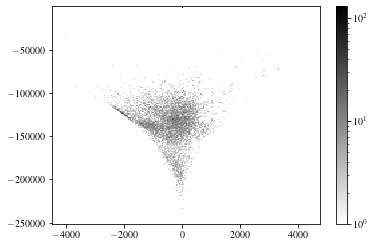

In [31]:
from matplotlib.colors import LogNorm

mask_plot = (np.abs(Lz)<7000) & (E>-5e5) & (E<0)
plt.hist2d(Lz[mask&mask_plot&(feh<-1)],E[mask&mask_plot&(feh<-1)],bins=200,cmap='binary', norm=LogNorm())
plt.colorbar()
# plt.xlim(-1,1)
# plt.ylim(-1,1)

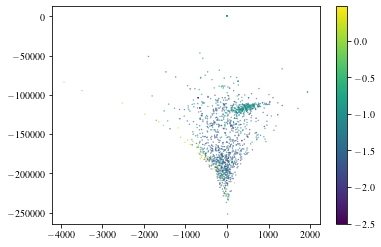

In [123]:
plt.scatter(Lz[mask&(rad<5)&(alfe<0)],E[mask&(rad<5)&(alfe<0)],s=0.1,c=feh[mask&(rad<5)&(alfe<0)])
plt.colorbar()
# plt.xlim(-1,1)
# plt.ylim(-1,1)

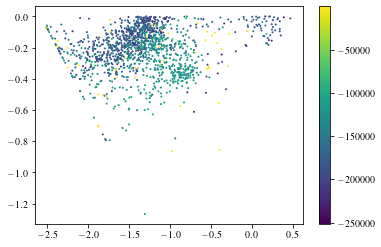

In [125]:
plt.scatter(feh[mask&(rad<5)&(alfe<0)],alfe[mask&(rad<5)&(alfe<0)],s=1,c=E[mask&(rad<5)&(alfe<0)])
plt.colorbar()

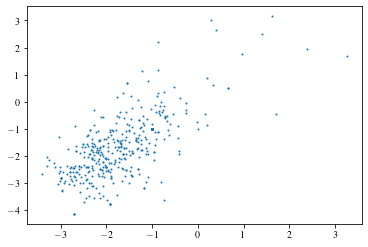

In [133]:
plt.scatter(data['xyz'][:,0,0][mask&(rad<5)&(alfe<0)&(E>-1.2e5)],data['xyz'][:,1,0][mask&(rad<5)&(alfe<0)&(E>-1.2e5)],s=1)


In [119]:
acc_mask = ( (mnfe > -10) & ((mgmn >= 0.25) & (alfe < -0.07)) |  \
            ((mgmn >= 4.25*alfe+0.5475) & (alfe >= -0.07)) )

(-270000.0, -50000.0)

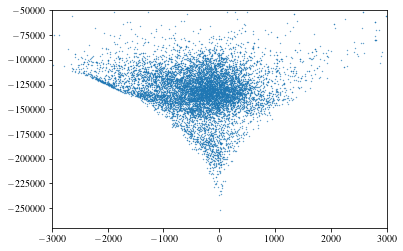

In [121]:
plt.scatter(Lz[mask&acc_mask&(dist<12000)],E[mask&acc_mask&(dist<12000)],s=0.1)
plt.xlim(-3000,3000)
plt.ylim(-270000,-50000)


(-270000.0, -50000.0)

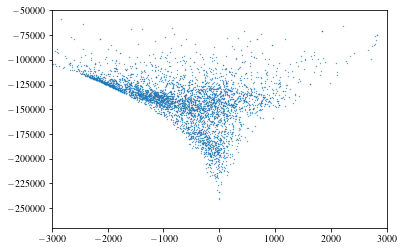

In [122]:
plt.scatter(Lz[mask&~acc_mask&(dist<12000)&(feh<-1)],E[mask&~acc_mask&(dist<12000)&(feh<-1)],s=0.1)
plt.xlim(-3000,3000)
plt.ylim(-270000,-50000)


In [46]:
rapo = data['r_apo'][:,0]
rperi = data['r_per'][:,0]
ecc = data['ecc'][:,0]


(0.0, 30.0)

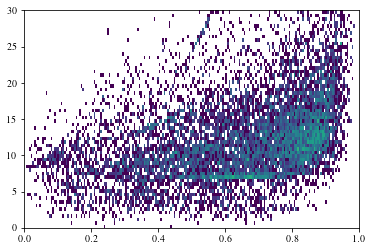

In [48]:
plt.hist2d(ecc[mask&acc_mask],rapo[mask&acc_mask],bins=400,norm=LogNorm())
plt.xlim(0,1)
plt.ylim(0,30)
